# Train MMSeg Notebook

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

if "notebooks" in os.getcwd():
    print("Running in Jupyter Notebook")
    os.chdir("..")

if "mmsegmentation" in os.getcwd():
    os.chdir("..")

# from src.dataset import *
# from src.config import *

In [2]:
# check gpu
import torch
print(torch.cuda.is_available())

True


/home/alberto/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# ids = db.getImgIds()
# img_file = db.loadImgs(ids[3])[0]['file_name']

# img = get_image(ids[0])
# mask = get_mask(ids[0])
# print(img.shape, mask.shape)

# overlay_mask(img_file)

## Check installation MMCV

In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.12.0+cu113 True
1.2.2


/home/alberto/Documentos/GitHub/OR_FashionParsing/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


/home/alberto/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/home/alberto/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/home/alberto/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/home/alberto/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/mmengine/visualization/visualizer.

KeyboardInterrupt: 

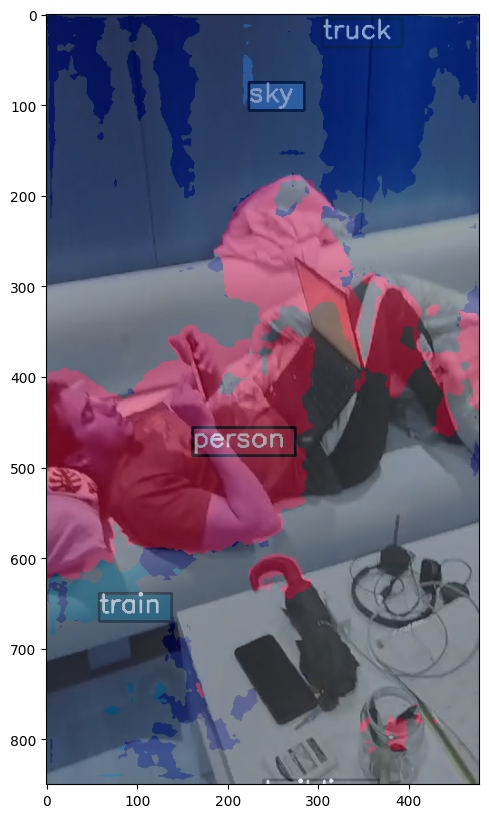

In [41]:
import os
if "mmsegmentation" not in os.getcwd():
    os.chdir('mmsegmentation')
    
from mmseg.apis import inference_model, init_model, show_result_pyplot
import mmcv

config_file = 'pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

# # test a single image and show the results
# img = 'demo/demo.png'  # or img = mmcv.imread(img), which will only load it once
# result = inference_model(model, img)
# # visualize the results in a new window
# show_result_pyplot(model, img, result, show=True)
# # or save the visualization results to image files
# # you can change the opacity of the painted segmentation map in (0, 1].
# show_result_pyplot(model, img, result, show=True, out_file='result.jpg', opacity=0.5)
# test a video and show the results
video = mmcv.VideoReader('video_ferxo.mp4')
from tqdm import tqdm
for i,frame in enumerate(video):
   result = inference_model(model, frame)
   plt.imshow(show_result_pyplot(model, frame, result, wait_time=0))
   plt.savefig(f'images_ferxo/result_{i}.jpg')

In [45]:
import cv2
import os
if "mmsegmentation" not in os.getcwd():
    os.chdir('mmsegmentation')
    
image_folder = 'images_ferxo'
video_name = 'video_ferxo_seg.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 3, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [32]:
for frame in video:
#    result = inference_model(model, frame)
   plt.imshow(show_result_pyplot(model, frame, result, wait_time=1))
   plt.show()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7178be292560>>
Traceback (most recent call last):
  File "/home/alberto/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7178be292560>>
Traceback (most recent call last):
  File "/home/alberto/anaconda3/envs/openmmlab2/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
